In [19]:
from urllib.request import HTTPError
import json
import os
import urllib.parse
import urllib.request
import json, requests
import sys, re,  matplotlib.pyplot as plt
from collections import Counter
from pylab import *


In [33]:
import plotly.plotly as py
import plotly.graph_objs as go
from collections import OrderedDict

In [39]:
import plotly
plotly.tools.set_credentials_file(username='thakar.p', api_key='gHPesQzdEVuqTsjyyqJ4')

In [2]:
nyt_key=os.getenv('auth_key')

In [11]:


year=2016
months=[z for z in range(1,2,3)]
for j in months:    
    for i in range(10):
        url = 'https://api.nytimes.com/svc/archive/v1/'+str(year)+'/'+str(j)+'.json?api-key='+nyt_key+'&page='+str(i)
        #print(url)
        resp = requests.get(url=url)
        data = json.loads(resp.text)
        with open('pdpd.json', 'w') as jsonFile:
            json.dump(data, jsonFile)
        

In [15]:
import json
from pprint import pprint

with open('pdpd.json') as data_file:    
    data = json.load(data_file)


In [45]:
sections = []

for i in range(len(data["response"]["docs"])):
    temp = data["response"]["docs"][i]["section_name"]
    sections.append(str(temp.encode('ascii','ignore').decode('ascii')))
    


In [48]:


counter11=OrderedDict(sorted(counter1.items(), key=lambda pair: pair[1], reverse=True))

In [49]:

fig = {
  "data": [
    {
      "values": list(counter11.values())[:10],
      "labels": list(counter11.keys())[:10],
      "domain": {"x": [0, .50]},
      "name": "2016 Business Subsection",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }     
],
  "layout": {
        "title":"Compare Section of articles ",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Sections",
                "x": 0.20,
                "y": 0.5
            }
        
        ]
    }
}
py.iplot(fig)

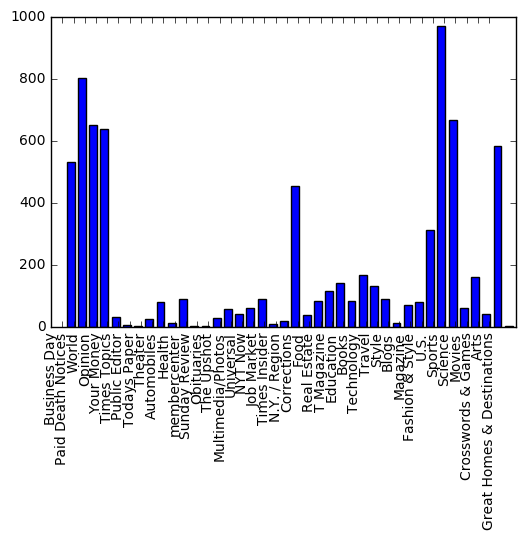

In [47]:
counter1 = Counter(sections)
names1 = counter1.keys()
counts1 = counter1.values()

indexes = arange(len(names1))
width = 0.7
plt.bar(indexes, counts1, width)
plt.xticks(indexes - width * 2, names1, rotation=90)
plt.show()